# Load necessary library

In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, MeanShift, SpectralClustering, affinity_propagation
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors

# Elbow method to determine the number of clusters

In [9]:
# ELBOW METHOD
def elbowmethod(data):
    X = data  # <your_data>
    distorsions = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        distorsions.append(kmeans.inertia_)

    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(1, 10), distorsions, 'bo-')
    plt.grid(True)
    plt.ylabel("Square Root Error")
    plt.xlabel("Number of Clusters")
    plt.title('Elbow curve')
    plt.savefig("ElbowCurve.png")
    plt.show()

## Load the age data

In [77]:
with open(r"C:\Users\VY\Downloads\df.csv") as f: 
    age_df = pd.read_csv(f)

In [81]:
age_df.head()

,Unnamed: 0,X,gwb_code_10,gm_naam,recs,ind_wbi,Number.of.inhabitants,Number.of.man,Numbers.of.people.from.0.14.years.old,Number.of.people.from.15.24.years.old,...,DistanceToSauna_108,DistanceToTanningSalon_109,DistanceToAttraction_110,Within10Km_111,Within20Km_112,Within50Km_113,DistanceToFireStation_114,code,year,livability_score
0,0,2,340101,Almere,Buurt,3,1580,740,155,150,...,2.7,0.4,2.4,4.0,7.0,50.0,4.6,340101,2021,4.113391
1,1,3,340102,Almere,Buurt,3,2860,1375,515,290,...,2.6,1.2,2.3,4.0,6.6,49.6,4.4,340102,2021,3.965993
2,2,16,340201,Almere,Buurt,3,4755,2470,555,460,...,2.0,0.5,3.8,4.0,6.0,46.8,1.2,340201,2021,4.035158
3,3,17,340202,Almere,Buurt,3,10430,5080,1570,1645,...,3.3,1.3,3.8,4.0,5.9,45.0,1.4,340202,2021,4.031153
4,4,18,340203,Almere,Buurt,3,5710,2875,1035,890,...,4.5,2.6,3.1,4.0,5.2,44.2,1.6,340203,2021,3.966037


In [91]:
# Display the first few rows to understand the data structure
print(age_df.head())

# Select the relevant columns for age groups
age_columns = [
    'Numbers.of.people.from.0.14.years.old', 
    'Number.of.people.from.15.24.years.old', 
    'Number.of.people.from.25.44.years.old', 
    'Number.of.people.from.45.64.years.old', 
    'Number.of.people....65.years.old'
]

# Define the average age for each age group
average_ages = [7, 20, 35, 55, 70]

# Ensure we are working on the original DataFrame to avoid SettingWithCopyWarning
age_df = age_df.loc[:, age_columns + ['Number.of.inhabitants']]

# Calculate the total number of inhabitants for each row
age_df['Number.of.inhabitants'] = age_df[age_columns].sum(axis=1)

# Calculate the weighted average age for each row
age_df['Weighted_Average_Age'] = (
    age_df['Numbers.of.people.from.0.14.years.old'] * 7 +
    age_df['Number.of.people.from.15.24.years.old'] * 20 +
    age_df['Number.of.people.from.25.44.years.old'] * 35 +
    age_df['Number.of.people.from.45.64.years.old'] * 55 +
    age_df['Number.of.people....65.years.old'] * 70
) / age_df['Number.of.inhabitants']

# Display the DataFrame with the new column
print(age_df[['Number.of.inhabitants', 'Weighted_Average_Age']].head())

   Numbers.of.people.from.0.14.years.old  \
0                                    155   
1                                    515   
2                                    555   
3                                   1570   
4                                   1035   

   Number.of.people.from.15.24.years.old  \
0                                    150   
1                                    290   
2                                    460   
3                                   1645   
4                                    890   

   Number.of.people.from.25.44.years.old  \
0                                    400   
1                                    810   
2                                   1910   
3                                   2550   
4                                   1535   

   Number.of.people.from.45.64.years.old  Number.of.people....65.years.old  \
0                                    315                               565   
1                                    685         

In [97]:
# Calculate the variance for each row
age_df['Variance_Age'] = (
    (age_df['Numbers.of.people.from.0.14.years.old'] * (7 - age_df['Weighted_Average_Age'])**2) +
    (age_df['Number.of.people.from.15.24.years.old'] * (20 - age_df['Weighted_Average_Age'])**2) +
    (age_df['Number.of.people.from.25.44.years.old'] * (35 - age_df['Weighted_Average_Age'])**2) +
    (age_df['Number.of.people.from.45.64.years.old'] * (55 - age_df['Weighted_Average_Age'])**2) +
    (age_df['Number.of.people....65.years.old'] * (70 - age_df['Weighted_Average_Age'])**2)
) / age_df['Number.of.inhabitants']


# Standard deviation is the square root of the variance
age_df['Standard_Deviation_Age'] = np.sqrt(age_df['Variance_Age'])
age_df[['Number.of.inhabitants', 'Weighted_Average_Age', 'Standard_Deviation_Age']].head()

,Number.of.inhabitants,Weighted_Average_Age,Standard_Deviation_Age
0,1585,47.293375,21.517487
1,2865,40.132635,21.784760
2,4750,40.360000,19.244435
3,10430,39.320709,20.525905
4,5715,36.665792,19.925854


# Clustering

In [14]:
with open(r"C:\Users\VY\Downloads\normalized_variables.csv") as f:
    df_normalized = pd.read_csv(f)

In [15]:
df_normalized.head()

,Unnamed: 0,postal_code,prop_0-14,prop_15-24,prop_25-44,prop_45-64,prop_65+,prop_university,worker,prop_women,pop_density,liveability_score,Aid,Income,single_family_housing
0,0,340101,0.098101,0.094937,0.253165,0.199367,0.357595,0.170886,0.177215,0.534810,0.085318,0.441714,0.058480,0.119906,0.03
1,1,340102,0.180070,0.101399,0.283217,0.239510,0.197552,0.171329,0.195804,0.517483,0.158171,0.304973,0.140351,0.103448,0.65
2,2,340201,0.116719,0.096740,0.401682,0.223975,0.159832,0.319664,0.263933,0.481598,0.157137,0.369138,0.198830,0.170063,0.01
3,3,340202,0.150527,0.157718,0.244487,0.316874,0.130393,0.246405,0.194631,0.512464,0.137107,0.365422,0.345029,0.163009,0.68
4,4,340203,0.181261,0.155867,0.268827,0.316112,0.078809,0.182137,0.229422,0.496497,0.245857,0.305013,0.187135,0.137931,0.83


In [16]:
age_df_cluster_distribution = df_normalized.loc[:, 'prop_0-14':'prop_65+']
age_df_cluster_distribution

,prop_0-14,prop_15-24,prop_25-44,prop_45-64,prop_65+
0,0.098101,0.094937,0.253165,0.199367,0.357595
1,0.180070,0.101399,0.283217,0.239510,0.197552
2,0.116719,0.096740,0.401682,0.223975,0.159832
3,0.150527,0.157718,0.244487,0.316874,0.130393
4,0.181261,0.155867,0.268827,0.316112,0.078809
...,...,...,...,...,...
957,0.160473,0.136824,0.295608,0.265203,0.143581
958,0.182635,0.140719,0.314371,0.284431,0.074850
959,0.138462,0.115385,0.220000,0.324615,0.203077
960,0.150522,0.095380,0.271237,0.293592,0.187779


# KMeans Clustering

In [18]:
def evaluate_clustering(labels_pred, data):
    silhouette = silhouette_score(data, labels_pred) if len(np.unique(labels_pred)) > 1 else 0
    davies_bouldin = davies_bouldin_score(data, labels_pred)
    calinski_harabasz = calinski_harabasz_score(data, labels_pred)

    return {
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": davies_bouldin,
        "Calinski-Harabasz Index": calinski_harabasz
    }

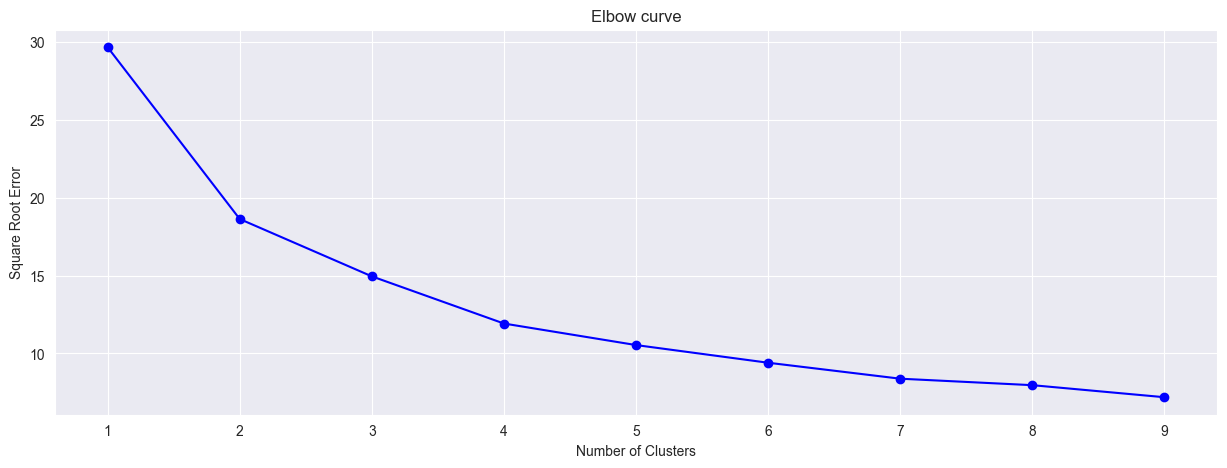

In [19]:
elbowmethod(age_df_cluster_distribution)

In [20]:
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit_transform(data)
    labels = kmeans.labels_
    return labels, evaluate_clustering(labels, data)

In [21]:
kmeans_clustering(age_df_cluster_distribution, 4)

(array([3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 1, 2, 2, 3, 2, 1, 2, 1, 1, 1, 0, 1,
        1, 1, 2, 2, 1, 2, 3, 2, 2, 3, 0, 2, 1, 3, 2, 2, 2, 2, 1, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2,
        3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 1, 2, 1, 3,
        2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 3, 2, 3, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3,
        0, 1, 2, 2, 3, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1,
        2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2,
        2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 0,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 2, 3, 2, 3, 0, 3, 0, 0, 2, 2, 3, 3, 3, 0, 3, 3, 0,
        2, 3, 3, 3, 2, 2, 0, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 3, 2, 1, 0, 3, 0, 1, 3, 3, 1, 2, 3, 3, 3, 0, 3, 3, 3, 3, 0,
        3, 3, 2, 1, 3, 0, 0, 2, 0, 0, 

In [22]:
kmeans_clustering(age_df_cluster_distribution, 5)

(array([0, 0, 3, 0, 1, 0, 0, 3, 1, 1, 3, 1, 1, 0, 1, 3, 3, 4, 4, 4, 2, 3,
        3, 3, 1, 1, 3, 3, 0, 1, 1, 0, 2, 3, 3, 0, 3, 1, 1, 3, 3, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 3, 1,
        1, 1, 4, 3, 3, 3, 3, 1, 4, 3, 3, 3, 4, 3, 4, 3, 1, 3, 1, 1, 1, 3,
        1, 3, 0, 1, 0, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 0, 3, 1, 3, 3, 3, 1,
        2, 3, 3, 1, 0, 2, 2, 2, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 1, 4,
        1, 1, 3, 1, 1, 3, 1, 4, 4, 3, 1, 3, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 2, 3, 3, 0, 0, 0, 2, 0, 0, 2,
        0, 0, 0, 1, 0, 3, 2, 3, 1, 1, 0, 1, 3, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 4, 2, 0, 2, 3, 0, 0, 3, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2,
        0, 0, 0, 4, 0, 2, 2, 3, 2, 2, 

In [99]:
age_df = age_df.loc[:, ['Weighted_Average_Age', 'Standard_Deviation_Age']]

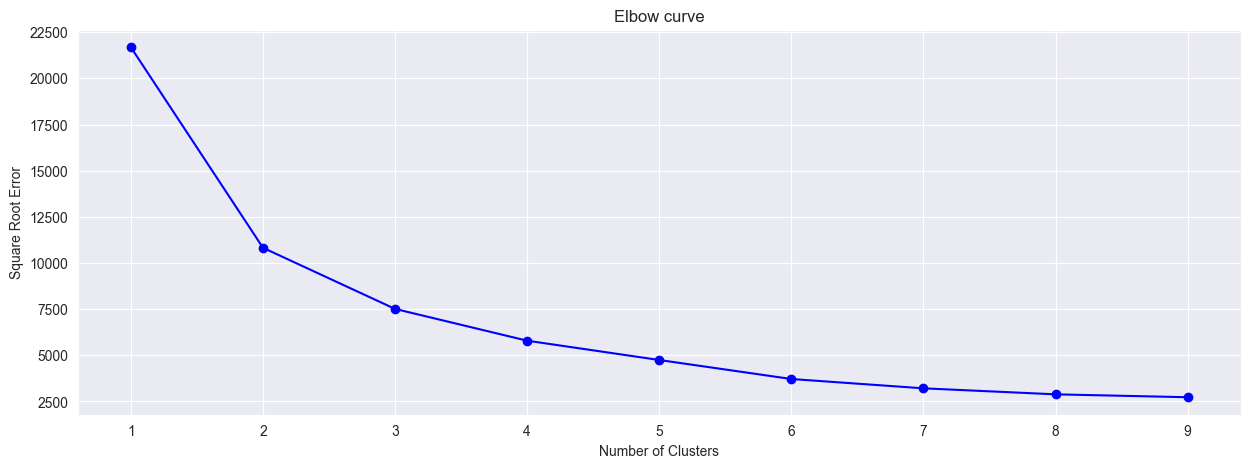

In [100]:
elbowmethod(age_df)

In [101]:
kmeans_clustering(age_df, 3)

(array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 0, 0,
        2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 0, 0,
        0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
        0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2,
        0, 1, 0, 2, 1, 2, 0, 0, 0, 2, 

In [110]:
# Add KMeans clustering to the df_normalized
df_normalized['age_cluster'] = kmeans_clustering(age_df, 3)[0]
df_normalized

,Unnamed: 0,postal_code,prop_0-14,prop_15-24,prop_25-44,prop_45-64,prop_65+,prop_university,worker,prop_women,pop_density,liveability_score,Aid,Income,single_family_housing,age_cluster
0,0,340101,0.098101,0.094937,0.253165,0.199367,0.357595,0.170886,0.177215,0.534810,0.085318,0.441714,0.058480,0.119906,0.03,1
1,1,340102,0.180070,0.101399,0.283217,0.239510,0.197552,0.171329,0.195804,0.517483,0.158171,0.304973,0.140351,0.103448,0.65,1
2,2,340201,0.116719,0.096740,0.401682,0.223975,0.159832,0.319664,0.263933,0.481598,0.157137,0.369138,0.198830,0.170063,0.01,0
3,3,340202,0.150527,0.157718,0.244487,0.316874,0.130393,0.246405,0.194631,0.512464,0.137107,0.365422,0.345029,0.163009,0.68,0
4,4,340203,0.181261,0.155867,0.268827,0.316112,0.078809,0.182137,0.229422,0.496497,0.245857,0.305013,0.187135,0.137931,0.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,957,3639700,0.160473,0.136824,0.295608,0.265203,0.143581,0.165541,0.222973,0.498311,0.259273,0.212271,0.122807,0.090909,0.00,0
958,958,3639701,0.182635,0.140719,0.314371,0.284431,0.074850,0.227545,0.221557,0.517964,0.266512,0.104720,0.081871,0.087774,0.00,0
959,959,3639702,0.138462,0.115385,0.220000,0.324615,0.203077,0.295385,0.169231,0.492308,0.137488,0.204621,0.093567,0.174765,1.00,1
960,960,3639703,0.150522,0.095380,0.271237,0.293592,0.187779,0.211624,0.195231,0.511177,0.126140,0.272844,0.128655,0.123041,0.56,1


In [23]:
social_df = df_normalized.loc[:,['prop_university', 'worker', 'Income']]
social_df

,prop_university,worker,Income
0,0.170886,0.177215,0.119906
1,0.171329,0.195804,0.103448
2,0.319664,0.263933,0.170063
3,0.246405,0.194631,0.163009
4,0.182137,0.229422,0.137931
...,...,...,...
957,0.165541,0.222973,0.090909
958,0.227545,0.221557,0.087774
959,0.295385,0.169231,0.174765
960,0.211624,0.195231,0.123041


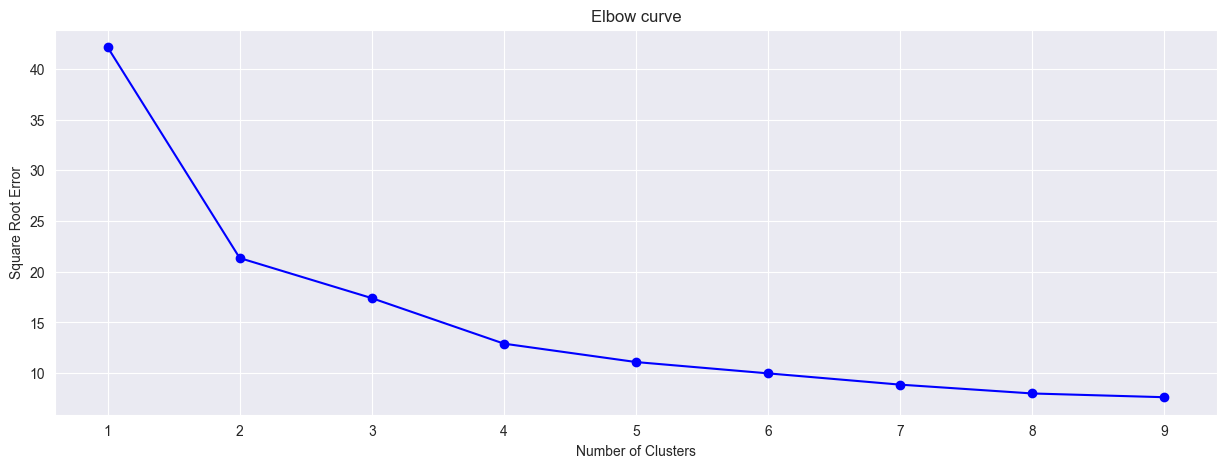

In [24]:
elbowmethod(social_df)

In [111]:
kmeans_clustering(social_df, 4)

(array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 3, 3, 2, 1,
        2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 2, 2, 3, 2, 2, 2,
        2, 2, 1, 2, 1, 2, 2, 0, 3, 3, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1,
        1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 0,
        2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 1, 2, 1, 2, 1,
        1, 2, 1, 1, 1, 1, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1,
        2, 3, 3, 3, 0, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3,
        2, 2, 3, 2, 1, 3, 2, 3, 3, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2,
        2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2,
        2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 1, 1,
        1, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3,
        2, 1, 1, 3, 2, 3, 2, 3, 3, 3, 

In [112]:
# Add KMeans clustering to the df_normalized
df_normalized['social_cluster'] = kmeans_clustering(social_df, 4)[0]

In [27]:
demographic_df = df_normalized.loc[:, ['pop_density','Aid','prop_women']]
demographic_df

,pop_density,Aid,prop_women
0,0.085318,0.058480,0.534810
1,0.158171,0.140351,0.517483
2,0.157137,0.198830,0.481598
3,0.137107,0.345029,0.512464
4,0.245857,0.187135,0.496497
...,...,...,...
957,0.259273,0.122807,0.498311
958,0.266512,0.081871,0.517964
959,0.137488,0.093567,0.492308
960,0.126140,0.128655,0.511177


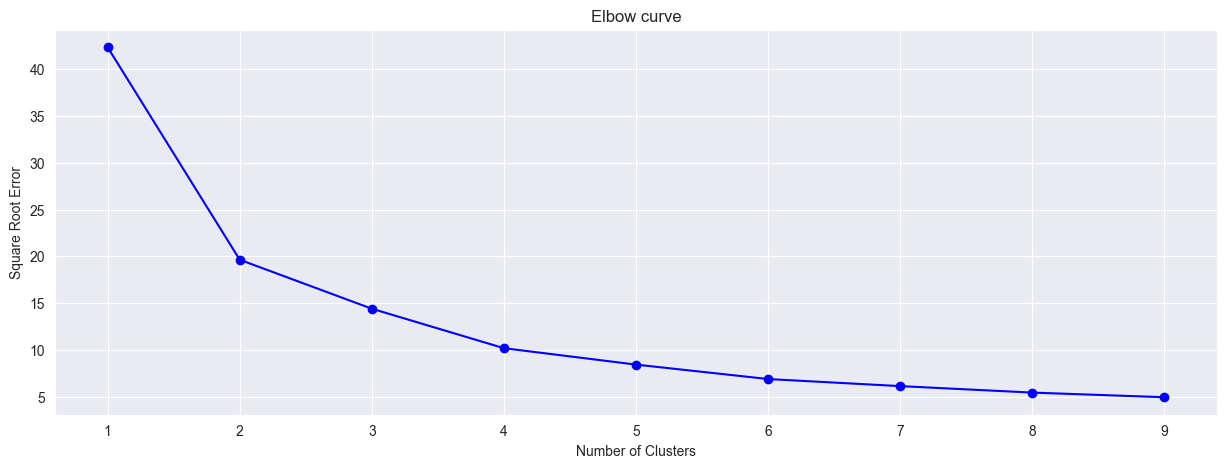

In [28]:
elbowmethod(demographic_df)

In [29]:
kmeans_clustering(demographic_df, 4)

(array([0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2,
        2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0,
        0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
        3, 0, 3, 2, 0, 2, 3, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2,
        2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2,
        2, 2, 0, 2, 0, 2, 3, 0, 0, 0, 3, 3, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2,
        0, 0, 0, 0, 2, 2, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0,
        2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2,
        2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0,
        2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 

In [30]:
kmeans_clustering(demographic_df, 3)

(array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2,
        2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2,
        2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2,
        2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2,
        0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0,
        2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2,
        2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0,
        2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 

In [31]:
kmeans_clustering(demographic_df, 2)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 

In [113]:
# Add KMeans clustering to the df_normalized
df_normalized['demographic_cluster'] = kmeans_clustering(demographic_df, 2)[0]

In [114]:
df_normalized

,Unnamed: 0,postal_code,prop_0-14,prop_15-24,prop_25-44,prop_45-64,prop_65+,prop_university,worker,prop_women,pop_density,liveability_score,Aid,Income,single_family_housing,age_cluster,social_cluster,demographic_cluster
0,0,340101,0.098101,0.094937,0.253165,0.199367,0.357595,0.170886,0.177215,0.534810,0.085318,0.441714,0.058480,0.119906,0.03,1,1,0
1,1,340102,0.180070,0.101399,0.283217,0.239510,0.197552,0.171329,0.195804,0.517483,0.158171,0.304973,0.140351,0.103448,0.65,1,1,0
2,2,340201,0.116719,0.096740,0.401682,0.223975,0.159832,0.319664,0.263933,0.481598,0.157137,0.369138,0.198830,0.170063,0.01,0,2,0
3,3,340202,0.150527,0.157718,0.244487,0.316874,0.130393,0.246405,0.194631,0.512464,0.137107,0.365422,0.345029,0.163009,0.68,0,1,0
4,4,340203,0.181261,0.155867,0.268827,0.316112,0.078809,0.182137,0.229422,0.496497,0.245857,0.305013,0.187135,0.137931,0.83,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,957,3639700,0.160473,0.136824,0.295608,0.265203,0.143581,0.165541,0.222973,0.498311,0.259273,0.212271,0.122807,0.090909,0.00,0,1,0
958,958,3639701,0.182635,0.140719,0.314371,0.284431,0.074850,0.227545,0.221557,0.517964,0.266512,0.104720,0.081871,0.087774,0.00,0,1,0
959,959,3639702,0.138462,0.115385,0.220000,0.324615,0.203077,0.295385,0.169231,0.492308,0.137488,0.204621,0.093567,0.174765,1.00,1,2,0
960,960,3639703,0.150522,0.095380,0.271237,0.293592,0.187779,0.211624,0.195231,0.511177,0.126140,0.272844,0.128655,0.123041,0.56,1,1,0


In [117]:
df_normalized.to_csv(r"C:\Users\VY\Downloads\df_normalized_cluster.csv")

# DBSCAN Clustering

In [32]:
def dbscan_clustering(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    return labels, evaluate_clustering(labels, data)

In [60]:
# The min_samples is 2 * dim the number of features, for age data, it is 2 * 5 = 10 
# We continue to find the epsilon
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit_age = neighbors.fit(age_df_cluster_distribution)
distances_age, indices_age = neighbors_fit_age.kneighbors(age_df_cluster_distribution)

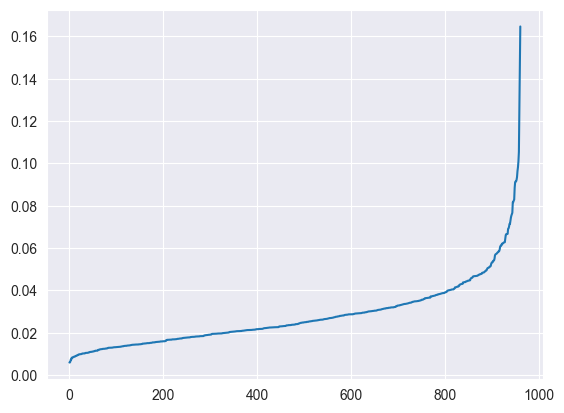

In [61]:
distances_age = np.sort(distances_age, axis=0)
distances_age = distances_age[:,1]
plt.plot(distances_age)

In [57]:
dbscan_clustering(age_df, 0.15, 10)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 

In [58]:
neighbors_fit_social = neighbors.fit(social_df)
distances_social, indices_social = neighbors_fit_social.kneighbors(social_df)

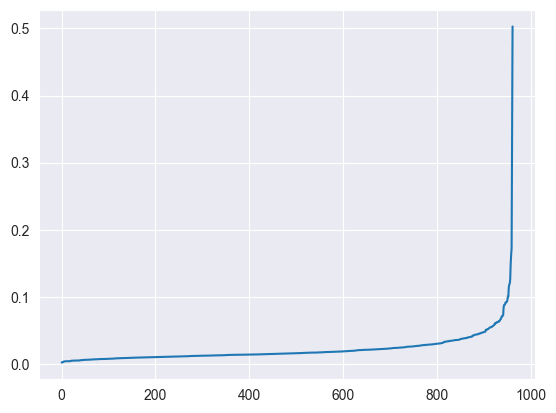

In [62]:
distances_social = np.sort(distances_social, axis=0)
distances_social = distances_social[:,1]
plt.plot(distances_social)

In [74]:
dbscan_clustering(social_df, 0.1, 10)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 

In [103]:
neighbors_fit_age_1 = neighbors.fit(age_df)
distances_age_1, indices_age_1 = neighbors_fit_age_1.kneighbors(age_df)

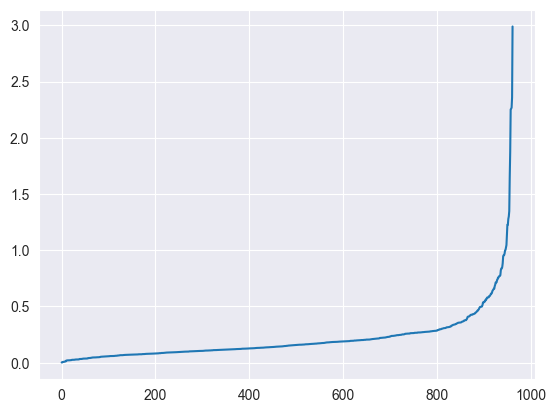

In [104]:
distances_age_1 = np.sort(distances_age_1, axis=0)
distances_age_1 = distances_age_1[:,1]
plt.plot(distances_age_1)

In [109]:
dbscan_clustering(age_df, 0.9, 10)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
         0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
         0, -1,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,
        -1, -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 